In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#plotting style 
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (8, 6)

dataset: https://archive.ics.uci.edu/dataset/45/heart+disease

In [2]:
# Load in Cleveland patient database
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 
  
# metadata 
print(heart_disease.metadata) 
  
# variable information 
print(heart_disease.variables) 

{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

In [3]:
print(f"Dimensions of the X matrix: {X.shape}")
print(f"Dimensions of the y matrix: {y.shape}")

Dimensions of the X matrix: (303, 13)
Dimensions of the y matrix: (303, 1)


In [4]:
# combine the X and y into a singular dataframe for first dataset.
df1 = pd.concat([X, y], axis = 1)

In [5]:
# read in Switzerland patient database
df2 = pd.read_csv("data/switzerland_dataset.csv")

In [6]:
df2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,32,1,1,95,0,?,0,127,0,.7,1,?,?,1
1,34,1,4,115,0,?,?,154,0,.2,1,?,?,1
2,35,1,4,?,0,?,0,130,1,?,?,?,7,3
3,36,1,4,110,0,?,0,125,1,1,2,?,6,1
4,38,0,4,105,0,?,0,166,0,2.8,1,?,?,2


In [7]:
df2 = df2.replace("?", np.nan)

In [8]:
# Combine the two datasets
df = pd.concat([df1 , df2], axis= 0, ignore_index= True)

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [9]:
print(f"dimensions of the dataset: {df.shape}")

dimensions of the dataset: (426, 14)


In [10]:
print(f"Number of unique values num (target variable) takes: {df["num"].nunique()}")
print(f"Values that num (target variable) takes: {df["num"].unique()}")

Number of unique values num (target variable) takes: 5
Values that num (target variable) takes: [0 2 1 3 4]


## Description of num variable for Datasets:

Value 0: No vessels with >50% diameter narrowing (absence of significant disease) 

Value 1: 1 major vessel with >50% diameter narrowing

Value 2: 2 major vessels with >50% diameter narrowing

Value 3: 3 major vessels with >50% diameter narrowing

Value 4: 4 major vessels with >50% diameter narrowing


Source:
"Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0)"   - UCI Irvine webpage : https://archive.ics.uci.edu/dataset/45/heart+disease

In [11]:
# I will be encoding values 1-4 of the num variable as "1", as all of these values signify heart risk as at least 1 major vessel is > %50 diameter narrowing

# Ecode target variable as 0 or 1
df["target"] = np.where(df["num"].isin([1, 2, 3, 4]), 1, 0)

df = df.drop("num", axis = 1)


## Quick first look at full dataset

In [12]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [13]:
print(f"number of duplicates : {df.duplicated().sum()}")

number of duplicates : 0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       426 non-null    int64 
 1   sex       426 non-null    int64 
 2   cp        426 non-null    int64 
 3   trestbps  424 non-null    object
 4   chol      426 non-null    int64 
 5   fbs       351 non-null    object
 6   restecg   425 non-null    object
 7   thalach   425 non-null    object
 8   exang     425 non-null    object
 9   oldpeak   420 non-null    object
 10  slope     409 non-null    object
 11  ca        304 non-null    object
 12  thal      372 non-null    object
 13  target    426 non-null    int64 
dtypes: int64(5), object(9)
memory usage: 46.7+ KB


In [15]:
df.describe(include = "all")

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,426.000000,426.000000,426.000000,424.0,426.000000,351.0,425.0,425.0,425.0,420.0,409.0,304.0,372.0,426.000000
unique,NaN,NaN,NaN,70.0,NaN,4.0,6.0,158.0,4.0,75.0,6.0,6.0,6.0,NaN
top,NaN,NaN,NaN,120.0,NaN,0.0,0.0,162.0,0.0,0.0,1.0,0.0,3.0,NaN
freq,NaN,NaN,NaN,37.0,NaN,258.0,151.0,11.0,204.0,99.0,142.0,176.0,166.0,NaN
mean,54.692488,0.748826,3.314554,NaN,175.464789,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.596244
std,9.034928,0.434198,0.922719,NaN,120.135100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.491227
min,29.000000,0.000000,1.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,48.250000,0.250000,3.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,56.000000,1.000000,4.000000,NaN,217.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
75%,61.000000,1.000000,4.000000,NaN,260.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


## Preprocessing steps

In [16]:
# datatype conversions:
# To numeric
numeric_cols = ["age", "trestbps", "chol", "thalach", "oldpeak"]

for var in numeric_cols:
    df[var] = pd.to_numeric(df[var], errors = "coerce")

# to categorical
categorical_cols = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal", "target"]

for var in categorical_cols:
    df[var] = pd.to_numeric(df[var], errors = "coerce").astype("Int64")

    df[var] = df[var].astype("category")

df = df.convert_dtypes()

df.dtypes

age            Int64
sex         category
cp          category
trestbps       Int64
chol           Int64
fbs         category
restecg     category
thalach        Int64
exang       category
oldpeak      Float64
slope       category
ca          category
thal        category
target      category
dtype: object

### There are 14 variables total in the dataset

- Age is an quantitive integer variable measured in year 

- Sex is a categorical variable taking on values 0 for Female and 1 for Male

- cp is a categorical variable with 4 levels, signifying chest pain type chest: 
        -- Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic

- trestbps is an quantitative integer variable denoting resting blood pressure when the patient was admitted to the hospital in mm Hg

- chol is an quantitive integer variable denoting serum cholestoral in mg/dl

- fbs is a binary categorical variable, taking value 1 if fasting blood sugar > 120 mg/dl and 0 otherwise

- restecg is a categorical variable depicting resting electrocardiographic results: 
        -- Value 0: normal
        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

- thalach is an integer quantitative variable depicting maximum heart rate achieved

- exang is a binary categorical variable denoting exercise induced angina (1 = yes; 0 = no)

- oldpeak is a quantitative float variable denoting ST depression induced by exercise relative to rest, measured in mm. Simply put, Oldpeak measures how much your heart's electrical signal "drops" during exercise compared to when you're resting. Higher values are more concerning as it suggests your heart is having trouble getting oxygen when exercising. 

- slope is a integer categorical variable which depicts the slope of the peak exercise ST segment:
        -- Value 1: upsloping
        -- Value 2: flat
        -- Value 3: downsloping

- ca is a integer categorical variable represting the number of major vessels covered by flourospy. Takes values 0 to 3.

- thal is a categorical integer variable taking values: thal: 3 = normal; 6 = fixed defect; 7 = reversable defect. Values 6 and 7 are where the concern is as it shows blockage of blood flow during exertion (exercise, that sort of thing).

- Target is a integer categorical variable of interest, where 1 = diagnosis of heart disease, 0 = no diagnosis of heart disease.


## EDA

In [17]:
print("Basic statistics for numeric data:")
df.describe()

Basic statistics for numeric data:


,age,trestbps,chol,thalach,oldpeak
count,426.0,424.0,426.0,425.0,420.0
mean,54.692488,131.266509,175.464789,141.555294,0.932143
std,9.034928,19.130316,120.1351,26.957118,1.144725
min,29.0,80.0,0.0,60.0,-2.6
25%,48.25,120.0,0.0,122.0,0.0
50%,56.0,130.0,217.5,145.0,0.6
75%,61.0,140.0,260.75,162.0,1.6
max,77.0,200.0,564.0,202.0,6.2


In [18]:
# Categorical varible counts
print("categorical variable counts:")

df[categorical_cols].describe()

categorical variable counts:


,sex,cp,fbs,restecg,exang,slope,ca,thal,target
count,426,426,351,425,425,409,304,372,426
unique,2,4,2,3,2,3,4,3,2
top,1,4,0,0,0,2,0,3,1
freq,319,242,301,236,272,201,176,185,254


##### I notice that the Chol 25 percent quantile is 0, which is quite strange. This is not normal, so I will explore whether or not 0 was used for the patients cholesterol if it wasn't measured. 

In [19]:
chol_zero_count = len(df[df["chol"] == 0])

print(f"The number of rows with cholesterol 0 value: {chol_zero_count}")

The number of rows with cholesterol 0 value: 123


In [20]:
df["chol"] = df["chol"].apply(lambda x: np.nan if x == 0 else x)

In [21]:
print("descriptive statistics for chol column")
df["chol"].describe()

descriptive statistics for chol column


count    303.000000
mean     246.693069
std       51.776918
min      126.000000
25%      211.000000
50%      241.000000
75%      275.000000
max      564.000000
Name: chol, dtype: float64

In [22]:
min_age  = df["age"].min()

max_age = df["age"].max()

age_range = max_age - min_age

print(f"Minimum age in the dataset: {min_age}\n")
print(f"Maximum age in the dataset: {max_age}\n")

Minimum age in the dataset: 29

Maximum age in the dataset: 77



In [23]:
print(f"Range of age in the dataset: {age_range}")

Range of age in the dataset: 48


### Distribution of target variable

In [24]:
print(f"Heart Disease Prevalence Percentage: {round(((df["target"] == 1).sum() / len(df)) * 100, 3)}%")

Heart Disease Prevalence Percentage: 59.624%


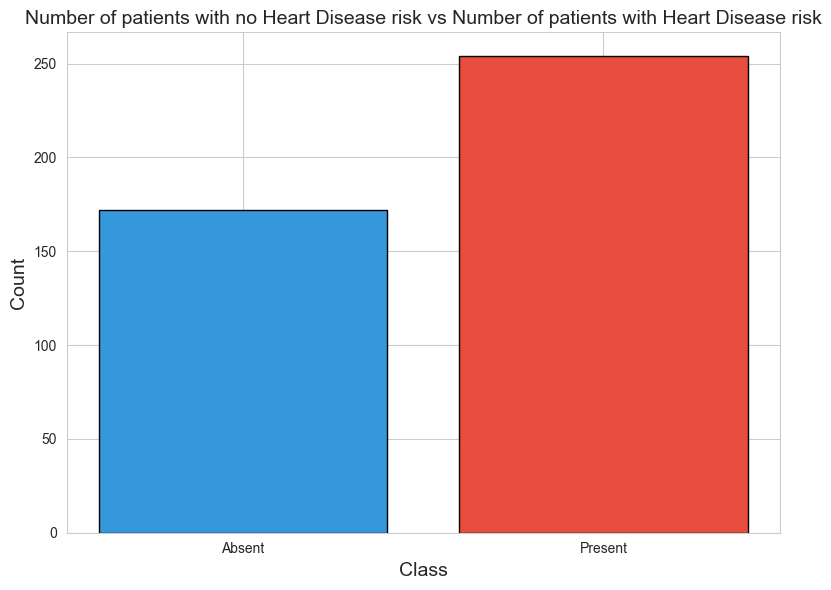

In [25]:
target_series = df["target"].astype(int)

target_values = target_series.value_counts()

plt.bar(x = target_values.index, height = target_values.values,
            color=['#e74c3c', '#3498db'],
            edgecolor='black')

plt.title("Number of patients with no Heart Disease risk vs Number of patients with Heart Disease risk", fontsize = 14)
plt.ylabel("Count", fontsize = 14)
plt.xlabel("Class", fontsize = 14)
plt.xticks([0,1], ["Absent", "Present"])
plt.tight_layout()

### Distribution of Quantitative variables (Univariate Analysis)

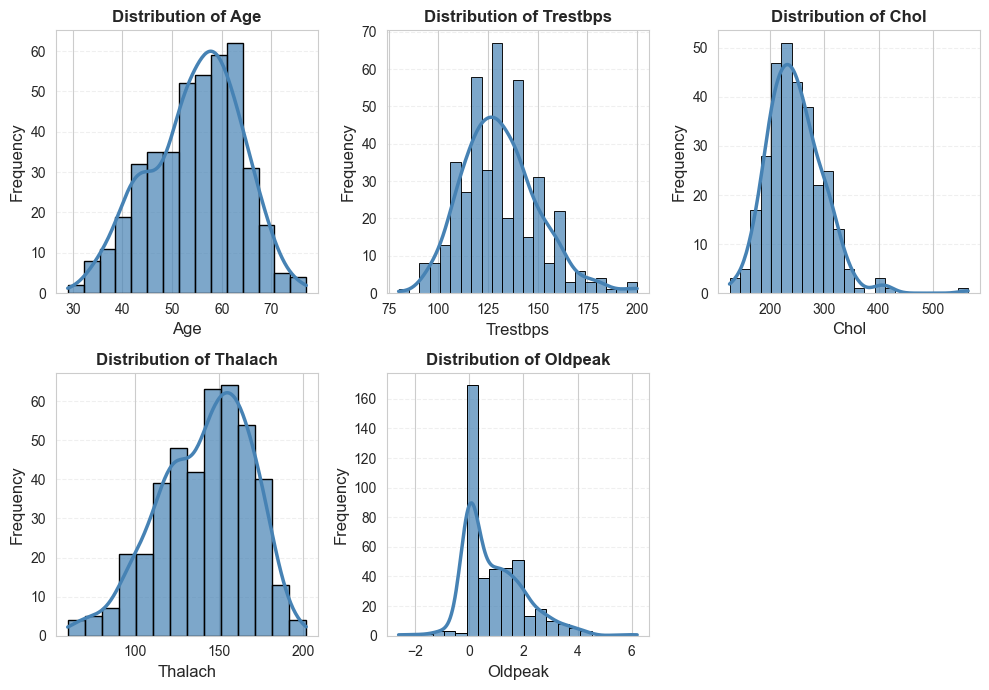

In [26]:
def hist(dataframe):
    fig, axs = plt.subplots(2, 3, figsize = (10, 7))

    axs = axs.flatten()

    for i, var in enumerate(numeric_cols):
            sns.histplot(x = var, data = dataframe, 
                        kde = True, 
                        line_kws= {"linewidth" : 2.5}, 
                        color = "steelblue",
                        edgecolor = "black",
                        alpha = 0.7,
                        ax = axs[i])
            axs[i].set_title(f"Distribution of {var.capitalize()}", fontsize = 12, fontweight = "bold")
            axs[i].set_xlabel(f"{var.capitalize()}", fontsize = 12)
            axs[i].set_ylabel("Frequency", fontsize = 12)
            axs[i].grid(axis = "y", alpha = 0.3, linestyle = "--")

    fig.delaxes(axs[5])
    plt.tight_layout()
    plt.show()

hist(df)

- cholesterol is approximately normally distributed in this dataset.

- oldpeak has a large peak at around value 0, suggesting that a majority of patients in the dataset do not have trouble with blood flow to the heart after exercising.

### Frequency of categorical variables between class with Heart Disease vs without Heart Disease (Univariate Analysis)

In [27]:
def category_histplot(df):
    categorical_cols_minusTarget = categorical_cols.copy()
    
    categorical_cols_minusTarget.remove("target")

    fig, axs = plt.subplots(3, 3, figsize = (10, 8))

    axs = axs.flatten()

    for i, var in enumerate(categorical_cols_minusTarget):
        sns.histplot(x = var, 
                data = df, 
                hue = "target",
                multiple = "stack",
                discrete= True,
                edgecolor = "black", 
                palette={0: '#3498db', 1: '#e74c3c'},
                ax = axs[i])
        
        for container in axs[i].containers:
            axs[i].bar_label(container, fmt = "%d", label_type = "edge", fontsize = 7)

        unique_vals = sorted(df[var].dropna().unique())
        axs[i].set_xticks(unique_vals)
        axs[i].set_xticklabels(unique_vals)

        axs[i].set_title(f"Distribution of {var.capitalize()} by Target", fontsize = 12, fontweight = "bold")
        axs[i].set_xlabel(f"{var.capitalize()}", fontsize = 12)
        axs[i].set_ylabel(f"Count", fontsize = 12)
        axs[i].legend(labels=["Disease", "No Disease"], 
                      title="Target", 
                      fontsize=6)


    fig.delaxes(axs[8])
    plt.tight_layout()
    plt.show()

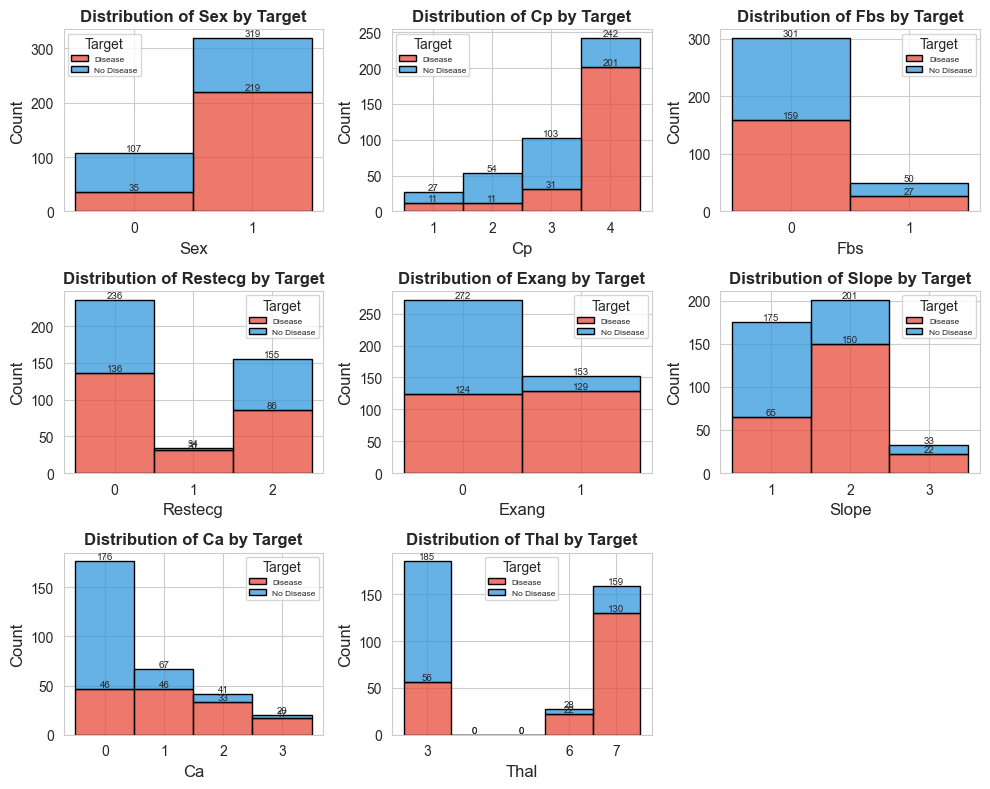

In [28]:
category_histplot(df)

Key Insights: 

- Over 2/3 of males in the dataset have heart disease, whereas less than half of females have disease, suggesting sex is an important risk factor.

- Patients with cp = 4 (asymptomatic chest pain) are overwhelmingly in the disease class. This suggests that asymptomatic chest pain appears to be a strong indicator of heart disease risk.

- Patients with restecg = 1 (ST-T wave abnormality - T wave inversions and/or ST elevation or depression > 0.05 mV) are predominantly in the disease class, indicating that ST-T wave abnormalities are a strong predictor of heart disease.

- The proportion of patients with heart disease is substantially higher among those who experience exercise-induced angina (exang = 1) compared to those who do not.

- Patients whose ST segment slope is flat or downsloping during peak exercise show a much higher disease rate compared to those with an upsloping pattern.

- The proportion of disease cases increases sharply when ca (number of major vessels colored by fluoroscopy) is greater than 0, suggesting that any vessel blockage visible on fluoroscopy indicates elevated heart disease risk.

- Patients with thal = 6 (fixed defect) or thal = 7 (reversible defect) predominantly have heart disease, unlike those with thal = 3 (normal), indicating that abnormal thallium stress test results are strongly associated with disease presence.

In [29]:
# def category_barplot(df):
#     categorical_cols_minusTarget = categorical_cols.copy()
    
#     categorical_cols_minusTarget.remove("target")

#     fig, axs = plt.subplots(3, 3, figsize = (10, 8))

#     axs = axs.flatten()

#     for i, var in enumerate(categorical_cols_minusTarget):
#         sns.countplot(x = var, 
#                 data = df, 
#                 hue = "target",
#                 edgecolor = "black", 
#                 ax = axs[i])
#         axs[i].set_title(f"Distribution of {var.capitalize()} by Target", fontsize = 12, fontweight = "bold")
#         axs[i].set_xlabel(f"{var.capitalize()}", fontsize = 12)
#         axs[i].set_ylabel(f"Count", fontsize = 12)
#         axs[i].legend(title = "Target", labels = ["No Disease", "Disease"], fontsize = 6)

#     fig.delaxes(axs[8])
#     plt.tight_layout()
#     plt.show()

### Pair-Plots

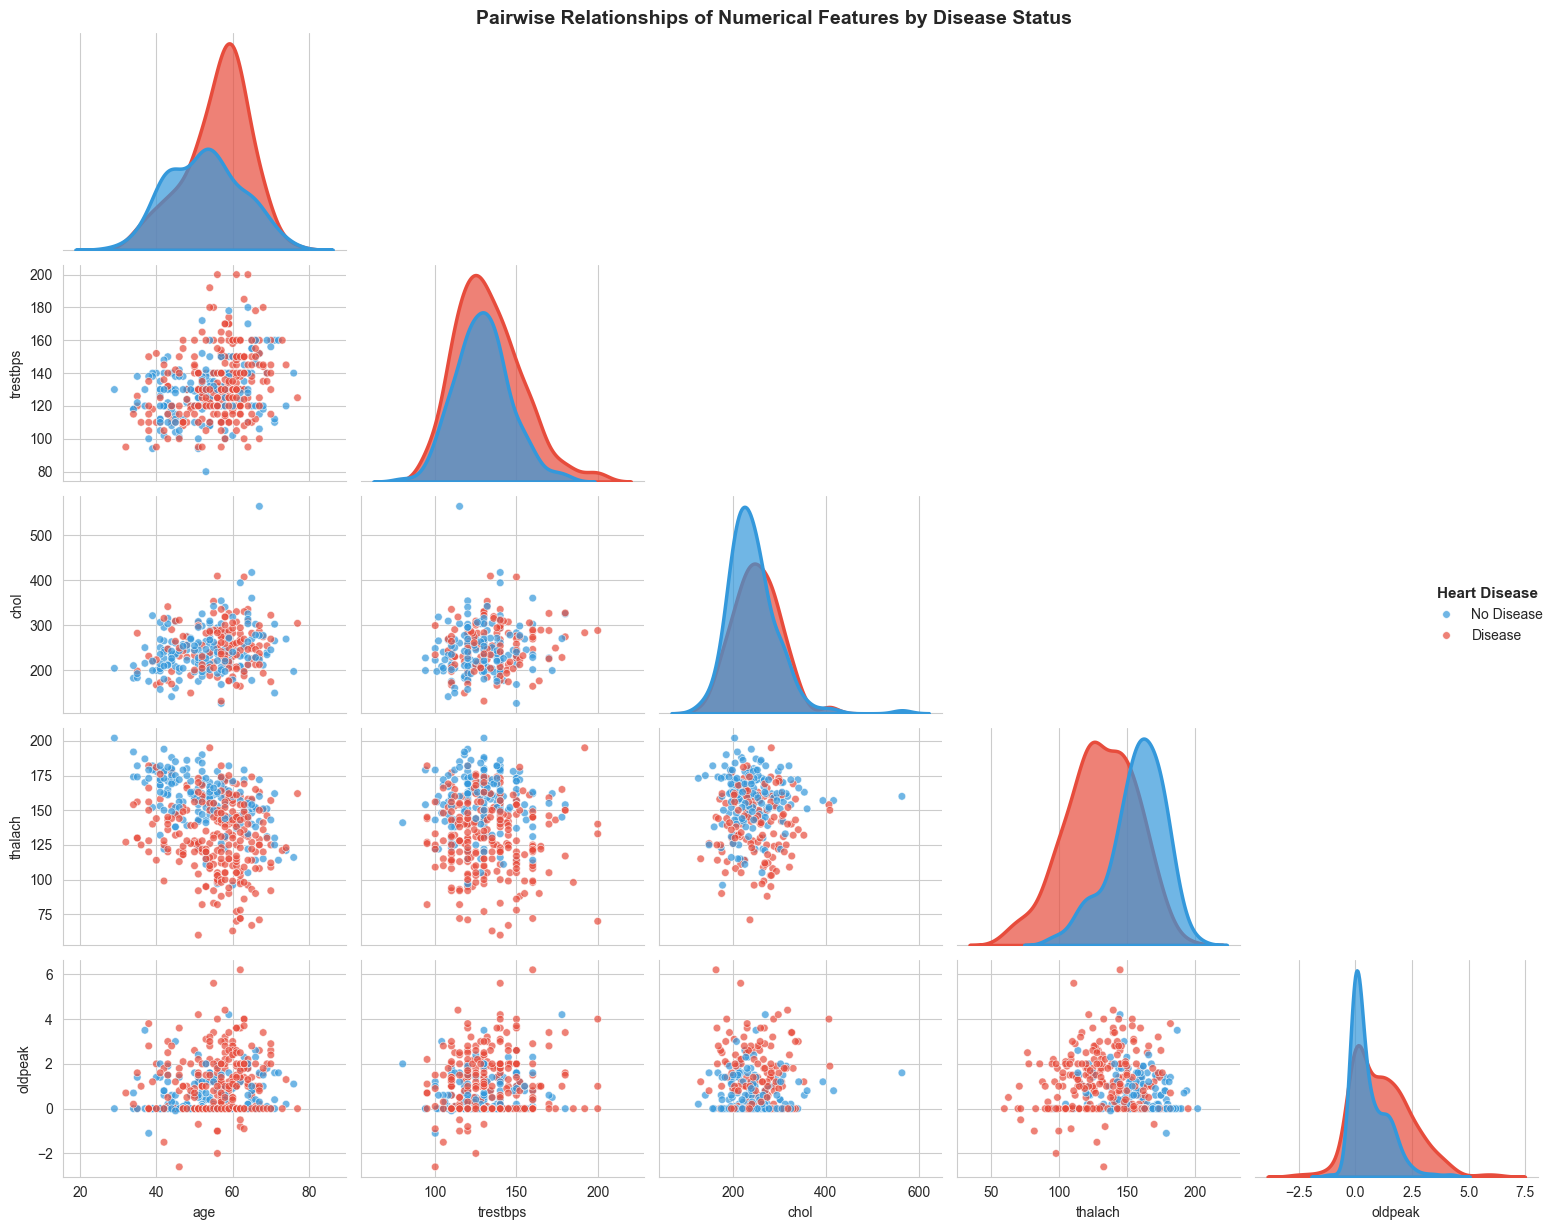

In [30]:
g = sns.pairplot(
    data=df[numeric_cols + ["target"]],
    hue="target",
    diag_kind="kde",
    palette={0: "#3498db", 1: "#e74c3c"},  
    plot_kws={
        "alpha": 0.7,
        "s" : 30,
        "edgecolor" : "white",
        "linewidth" : 0.5
    },
    diag_kws= {
        "fill" : True,
        "alpha" : 0.7,
        "linewidth" : 2.5
    },
    corner=True,  
    height=2.5, 
    aspect=1.2   
)

g._legend.set_title("Heart Disease", prop={'size': 11, 'weight': 'bold'})
for text, label in zip(g._legend.texts, ["No Disease", "Disease"]):
    text.set_text(label)
    text.set_fontsize(10)

g.fig.suptitle("Pairwise Relationships of Numerical Features by Disease Status", 
               fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

Key Insights from Pair-Plots:

- Age and Thalach (Maximum heart rate achieved) show a moderate, negative correlation. Older patients tend to have a lower maximum heart rate.

- Patients with heart disease show higher oldpeak values (ST depression) compared to those without heart disease, suggesting that greater oldpeak values increase risk of heart disease.

- The kernel density estimate for the no disease group reveals that patients without the disease achieve a greater maximum heart rate (thalach) on average, compared to those with disease.

- The median age is higher for patients with disease compared to those without. The no disease group shows greater age variability, with a wider distribution and lower peak density.



### Missingness

In [31]:
print("number of missing values per column")
df.isna().sum()

number of missing values per column


age           0
sex           0
cp            0
trestbps      2
chol        123
fbs          75
restecg       1
thalach       1
exang         1
oldpeak       6
slope        17
ca          122
thal         54
target        0
dtype: int64

In [32]:
ca_percent_missing = round((df["ca"].isna().sum()) / len(df), 3)
chol_percent_missing = round(df["chol"].isna().sum() / len(df), 3)

print(f"Percent missing for chol column: {chol_percent_missing}")
print(f"Percent missing for ca column: {ca_percent_missing}")

Percent missing for chol column: 0.289
Percent missing for ca column: 0.286


Missing values most prevalent in "ca" and "chol" column

Text(70.72222222222221, 0.5, 'Row index')

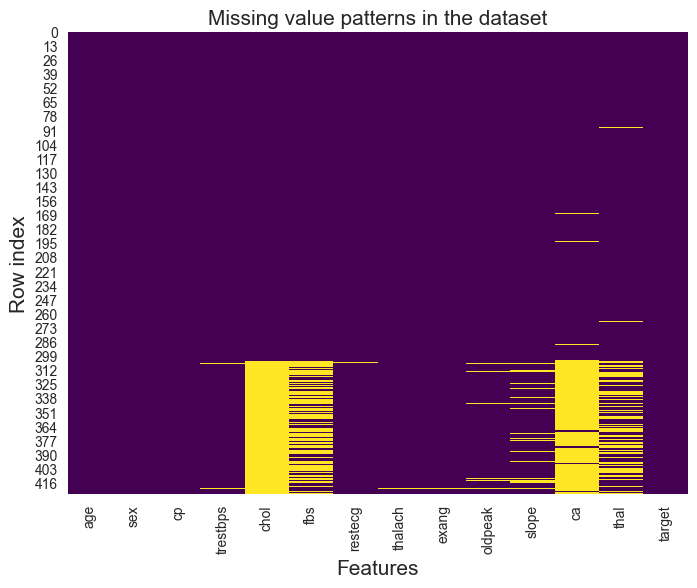

In [33]:
missing_data_mask = df.isna()

sns.heatmap(missing_data_mask, cbar = False, cmap = "viridis")
plt.title("Missing value patterns in the dataset", fontsize = 15)
plt.xlabel("Features", fontsize = 15)
plt.ylabel("Row index", fontsize = 15)

##### Majority of the missing data is coming from the Switzerland dataset. Data is very likely MNAR. For example, the ca which represents the number of major vessels covered by flourospy requires X-ray procedures in order to test whether your arteries are healthy with good blood flow. The procedure is costly to do and cannot be done on every patient. The decision to do cardiac catherization depends is directly related to the patients suspected heart disease severity. 

##### Other variables with many missing values are also very likely MNAR, such as slope, thal. fbs is likely MNAR as well since it requires the patient to be fasted in order to obtain the results, where Cleveland patients fbs values were collected, however Switzerlands werent. This could be for sveral reasons, one being difference of hospital procedures/policies.

##### All of the missing data for the chol variable comes from the Switzerland dataset and were labeled value 0 before conversion to NaN.

In [34]:
# Since the 4 main variables with a majority of the missing values are likely missing not at random, I want to create an indicator where 1 denotes the value for that column
# is missing and 0 otherwise
df["chol_missing"] = df["chol"].isna().astype(int)

df["ca_missing"] = df["ca"].isna().astype(int)

df["fbs_missing"] = df["fbs"].isna().astype(int)

df["slope_missing"] = df["slope"].isna().astype(int)

df["thal_missing"] = df["thal"].isna().astype(int)

### Correlation Heatmap

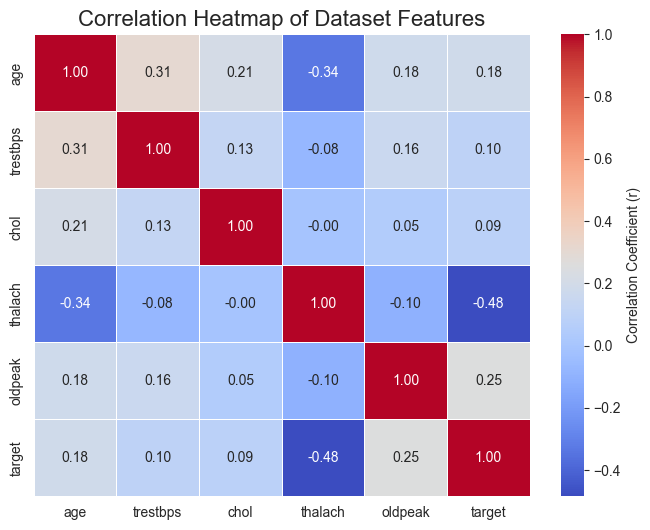

In [35]:
original_corr_num = df[numeric_cols + ["target"]].corr()

sns.heatmap(
    original_corr_num,
    annot=True,        
    cmap='coolwarm',    
    fmt='.2f',        
    linewidths=.5,      
    cbar_kws={'label': 'Correlation Coefficient (r)'} 
)

plt.title('Correlation Heatmap of Dataset Features', fontsize=16)
plt.show()

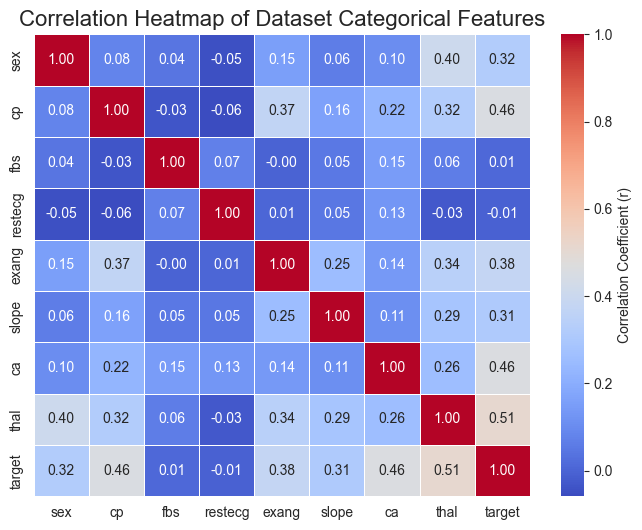

In [36]:
original_corr_cat = df[categorical_cols].corr()

sns.heatmap(
    original_corr_cat,
    annot=True,        
    cmap='coolwarm',    
    fmt='.2f',        
    linewidths=.5,      
    cbar_kws={'label': 'Correlation Coefficient (r)'} 
)

plt.title('Correlation Heatmap of Dataset Categorical Features', fontsize=16)
plt.show()

Using my Categorical variables for correlation calculations is reasonable as my categorical variables are ordinal. For example, cp (1-4): Severity of chest pain increases and ca (0-3): Number of vessels affected increases.

In [37]:
# Save original data with missing values
df.to_csv('heart_disease_original.csv', index=False)

### Simple imputations

In [38]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

def simple_imputation(df):

    # Mode imputation for categorical var and median for quantitative.

    df_imputed = df.copy()
    exclude_cols = ['target', 'ca_missing', 'fbs_missing', 'slope_missing', 'thal_missing']
    
    cat_cols = df_imputed.select_dtypes(include=['category']).columns
    for col in cat_cols:
        if col not in exclude_cols and df_imputed[col].isna().any():
            mode_val = df_imputed[col].mode()[0]
            df_imputed[col] = df_imputed[col].fillna(mode_val)
    
    num_cols = df_imputed.select_dtypes(include=[np.number]).columns
    for col in num_cols:
        if df_imputed[col].isna().any():
            median_val = df_imputed[col].median()
            df_imputed[col] = df_imputed[col].fillna(median_val)
    
    return df_imputed

In [39]:
df_simple = simple_imputation(df)

In [40]:
df_simple.to_csv("heart_disease_simple_imputation.csv")

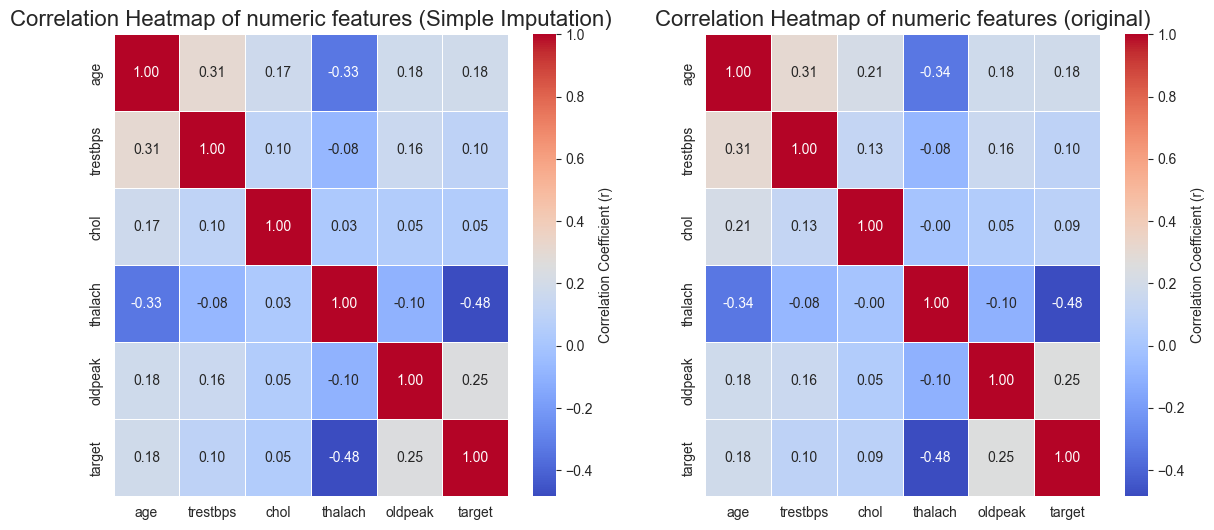

In [41]:
simple_corr_num = df_simple[numeric_cols + ["target"]].corr()

fig, axs = plt.subplots(1, 2, figsize = (14, 6))

sns.heatmap(
    simple_corr_num,
    annot=True,        
    cmap='coolwarm',    
    fmt='.2f',        
    linewidths=.5,      
    cbar_kws={'label': 'Correlation Coefficient (r)'},
    ax = axs[0]
)

sns.heatmap(
    original_corr_num,
    annot=True,        
    cmap='coolwarm',    
    fmt='.2f',        
    linewidths=.5,      
    cbar_kws={'label': 'Correlation Coefficient (r)'},
    ax = axs[1]
)

axs[0].set_title('Correlation Heatmap of numeric features (Simple Imputation)', fontsize=16)
axs[1].set_title('Correlation Heatmap of numeric features (original)', fontsize=16)
plt.show()

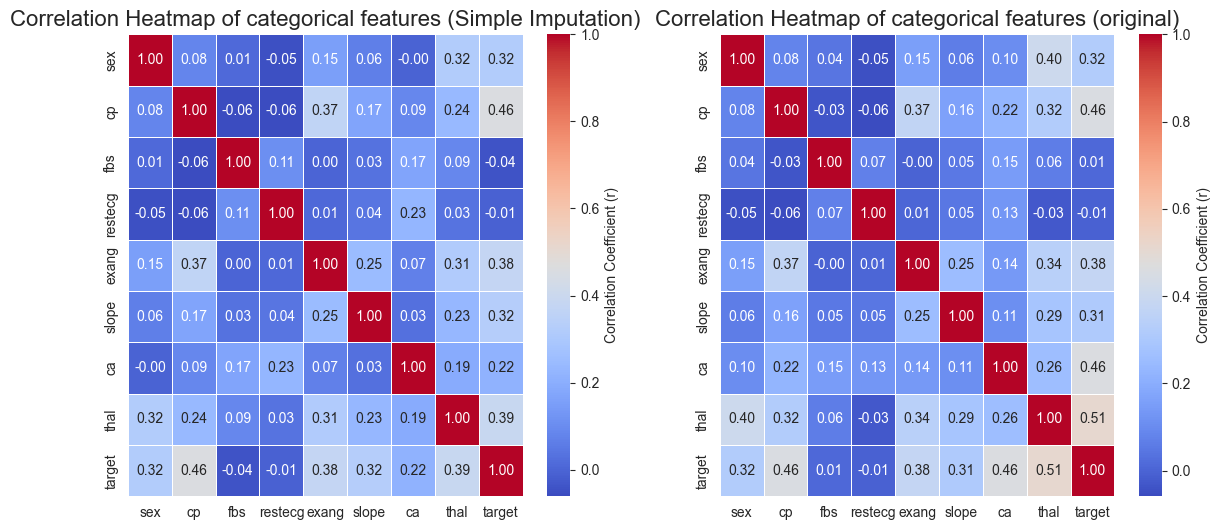

In [42]:
simple_corr_cat = df_simple[categorical_cols].corr()

fig, axs = plt.subplots(1, 2, figsize = (14, 6))

sns.heatmap(
    simple_corr_cat,
    annot=True,        
    cmap='coolwarm',    
    fmt='.2f',        
    linewidths=.5,      
    cbar_kws={'label': 'Correlation Coefficient (r)'},
    ax = axs[0]
)

sns.heatmap(
    original_corr_cat,
    annot=True,        
    cmap='coolwarm',    
    fmt='.2f',        
    linewidths=.5,      
    cbar_kws={'label': 'Correlation Coefficient (r)'},
    ax = axs[1]
)

axs[0].set_title('Correlation Heatmap of categorical features (Simple Imputation)', fontsize=16)
axs[1].set_title('Correlation Heatmap of categorical features (original)', fontsize=16)
plt.show()

Some of the correlation are changing directions from + to - and - to +, such as COR(exang, thal) and COR(sex, ca) after simple imputation techniques. Some of the correlation coefficient magnitudes are changing drastically as well, such as variable pair (ca, target) going from r = 0.46 to r = 0.22, a sizeable jump. The spikes in the correlation coefficients magnitude along with the direction changes supports reasoning that data is MNAR. 

### Advanced Imputation Approach (KNN)

In [43]:
from sklearn.impute import KNNImputer

def knn_imputation(df, n_neighbors=5):
    exclude_cols = ['target', 'ca_missing', 'fbs_missing', 'slope_missing', 'thal_missing']
    
    df_numeric = df.copy()
    cat_mappings = {}
    cat_cols = df.select_dtypes(include=['category']).columns
    
    for col in cat_cols:
        if col not in exclude_cols:
            cat_mappings[col] = {i: val for i, val in enumerate(df_numeric[col].dropna().unique())}
            df_numeric[col] = pd.Categorical(df_numeric[col]).codes
            df_numeric[col] = df_numeric[col].replace(-1, np.nan)
    
    impute_cols = [col for col in df_numeric.columns if col not in exclude_cols]
    
    imputer = KNNImputer(n_neighbors=n_neighbors)
    imputed_values = imputer.fit_transform(df_numeric[impute_cols])
    
    df_imputed = pd.DataFrame(imputed_values, columns=impute_cols, index=df.index)
    
    for col in cat_mappings:
        if col in df_imputed.columns:
            df_imputed[col] = df_imputed[col].round().astype(int)
            max_code = len(cat_mappings[col]) - 1
            df_imputed[col] = df_imputed[col].clip(0, max_code)
            df_imputed[col] = df_imputed[col].map(cat_mappings[col]).astype('category')
    
    for col in exclude_cols:
        if col in df.columns:
            df_imputed[col] = df[col]
    
    return df_imputed


In [44]:
df_knn = knn_imputation(df, n_neighbors=5)
df_knn.to_csv("heart_disease_knn_imputation.csv", index=False)

##### Correlation Heatmap after imputing with MICE Technique

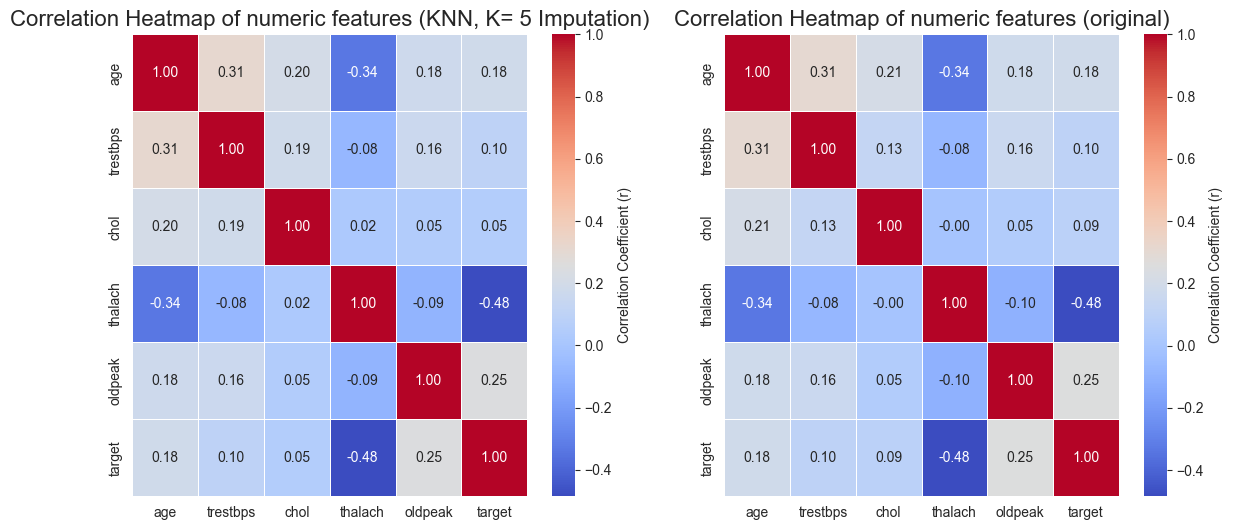

In [45]:
knn_corr_num = df_knn[numeric_cols + ["target"]].corr()

fig, axs = plt.subplots(1, 2, figsize = (14, 6))

sns.heatmap(
    knn_corr_num,
    annot=True,        
    cmap='coolwarm',    
    fmt='.2f',        
    linewidths=.5,      
    cbar_kws={'label': 'Correlation Coefficient (r)'},
    ax = axs[0]
)

sns.heatmap(
    original_corr_num,
    annot=True,        
    cmap='coolwarm',    
    fmt='.2f',        
    linewidths=.5,      
    cbar_kws={'label': 'Correlation Coefficient (r)'},
    ax = axs[1]
)

axs[0].set_title('Correlation Heatmap of numeric features (KNN, K= 5 Imputation)', fontsize=16)
axs[1].set_title('Correlation Heatmap of numeric features (original)', fontsize=16)
plt.show()

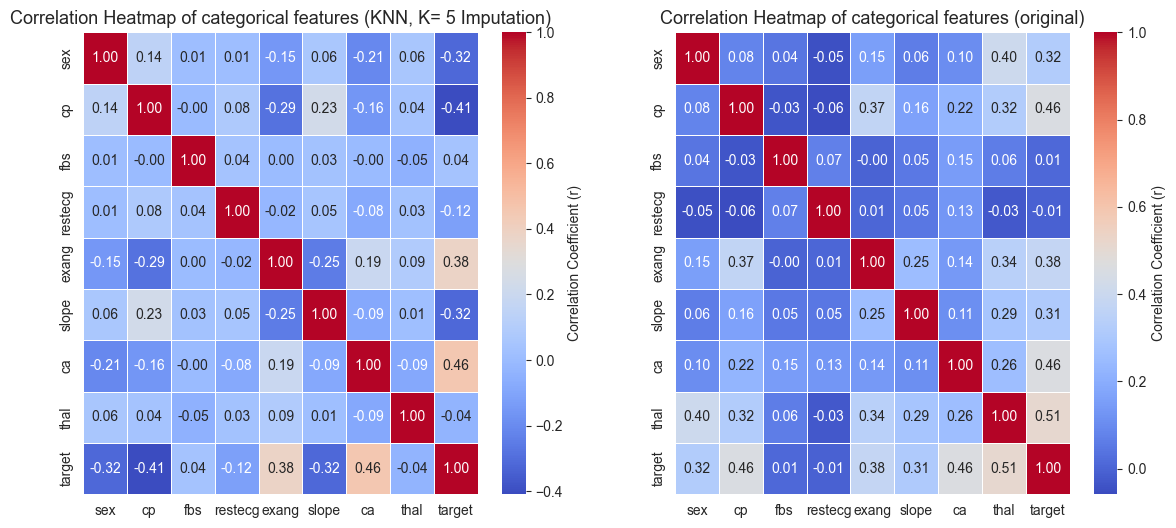

In [46]:
knn_corr_cat = df_knn[categorical_cols].corr()

fig, axs = plt.subplots(1, 2, figsize = (14, 6))

sns.heatmap(
    knn_corr_cat,
    annot=True,        
    cmap='coolwarm',    
    fmt='.2f',        
    linewidths=.5,      
    cbar_kws={'label': 'Correlation Coefficient (r)'},
    ax = axs[0]
)

sns.heatmap(
    original_corr_cat,
    annot=True,        
    cmap='coolwarm',    
    fmt='.2f',        
    linewidths=.5,      
    cbar_kws={'label': 'Correlation Coefficient (r)'},
    ax = axs[1]
)

axs[0].set_title('Correlation Heatmap of categorical features (KNN, K= 5 Imputation)', fontsize=13)
axs[1].set_title('Correlation Heatmap of categorical features (original)', fontsize=13)
plt.show()

Remarks:

Similer to simple imputation techniques, some of the correlation are changing directions from + to - and - to + after KNN Imputation. Some of the correlation coefficient magnitudes are changing drastically as well, where one key correlation coefficient for variable pair (thal, target) stands out. The original r is 0.51 which changes direction and magnitide drasticalyl to r = -0.04. This is not the only severse case, as pair (slope, target) changes direction completely from r = 0.31 to r = -0.31. The many similar patterns of the examples listed indicates that KNN is likely imputing poorly, i.e. learning patterns and trends from incorrect neighbors. The analysis of this correlation matrix between KNN imputation and the original strengthens the argument that the data is MNAR, and that careful analysis and model fitting techniques will need to be examined during later project work.